<h1>Demosaicing of Bayer-Patterned Color Images<h1>

<h3>PythonLib</h3>
<ul>
    <li><i>cv2</i> per la lettura delle immagini</li>
    <li><i>numoy</i> per calcoli conversioni e gestione matrici</li>
    <li><i>matplotlib.pyplot</i> per la visualizzazione dei risultati</li>
</ul>

In [1]:
import cv2
print("OpenCV version: ",cv2.__version__)

import numpy as np
from matplotlib import pyplot as plt

OpenCV version:  3.3.0


<h3>Funzioni del caso</h3>

<h6>img_invert_color:</h6>
Data un immagine inverte la posizione dei layer rgb $\leftrightarrow$ bgr


In [2]:
def img_invert_color(img):
    iimg = cv2.split(img);
    iimg = cv2.merge((iimg[2],iimg[1],iimg[0]))
    return iimg

In [3]:
def img_cut_border(img,l,r,t,d):
    img = img[l:img.shape[0]-r,t:img.shape[1]-d]
    if img.shape[0]%2==1:
        img = img[0:img.shape[0]-1,0:img.shape[1]]
    if img.shape[1]%2==1:
        img = img[0:img.shape[0],0:img.shape[1]-1]
    return img

In [4]:
def img_is_r_position(row,col): return ((row+1)%2 is 1and (col+1)%2 is 1)
def img_is_g_position_r_row(row,col): return ((row+1)%2 is 1 and (col+1)%2 is 0)
def img_is_g_position_b_row(row,col): return ((row+1)%2 is 0 and (col+1)%2 is 1)
def img_is_b_position(row,col): return ((row+1)%2 is 0 and (col+1)%2 is 0)

In [5]:
def img_read_and_cut(path,mLeft,mRight,mTop,mBottom): return img_cut_border(cv2.imread(path),0,0,0,0)

In [6]:
def img_to_plot(img,title):
    return {"source":img,"title":title}

In [7]:
def img_plot(fig_size,imgs):
    i=1
    plt.figure(figsize=fig_size)
    for img in imgs:
        plt.subplot(1,len(imgs),i)
        plt.title(img["title"])
        plt.imshow(img_invert_color(img["source"]))
        plt.xticks([]), plt.yticks([])
        if i==3: 
            plt.show()
            return
        else: i = i+1
    plt.show()
def img_plot_gray(fig_size,imgs):
    i=1
    plt.figure(figsize=fig_size)
    for img in imgs:
        plt.subplot(1,len(imgs),i)
        plt.title(img["title"])
        plt.imshow(img["source"], cmap="gray")
        plt.xticks([]), plt.yticks([])
        if i==3: 
            plt.show()
            return
        else: i = i+1
    plt.show()
    

In [8]:
def img_px_get_minor_5(img,row,col):
    return img[row-2:row+2,col-2:col+2]

In [9]:
def PSNR(img1,img2, border):
    img1 = img1.astype(np.float)
    img2 = img2.astype(np.float)
    MSE = 0.0
    for i in range(len(img1)-border)[border:]:
        for j in range(len(img1)-border)[border:]:
            MSE = MSE + np.linalg.norm(img1[i][j]-img2[i][j])       
    MSE = MSE/((len(img1)-6)*(len(img1)-6))
    PSNR = 20*np.log10(255/np.sqrt(MSE))
    return PSNR

In [10]:
def PSNRv(img1,img2,border):
    
    b1,g1,r1 = cv2.split(img1)
    b2,g2,r2 = cv2.split(img2)    
    
    print("Red Channel: ",PSNR(r1,r2,border),"dB")
    print("Green Channel: ",PSNR(g1,g2,border),"dB")
    print("Blue Channel: ",PSNR(b1,b2,border),"dB")
    print("Image: ",PSNR(img1,img2,border),"dB")
    return

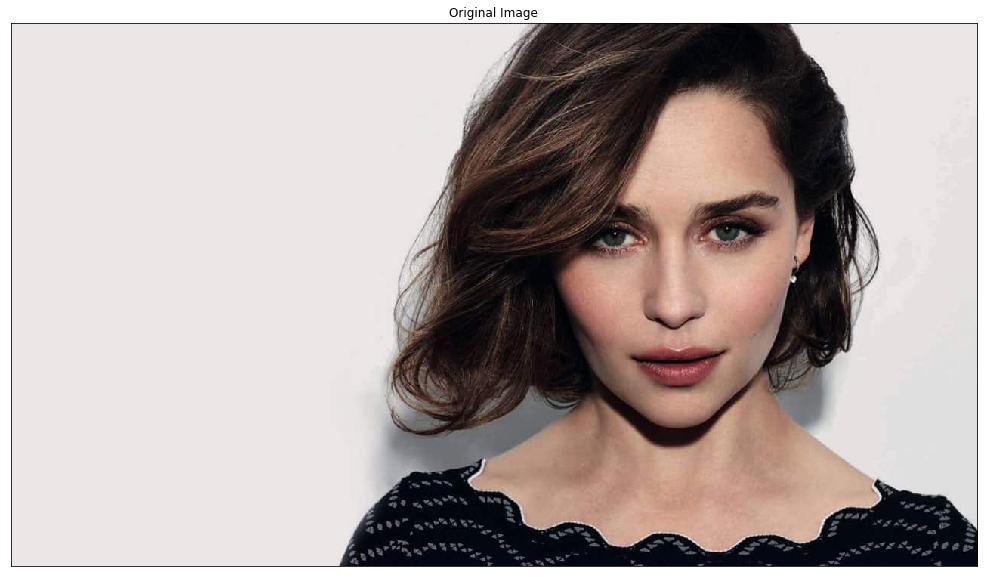

In [11]:
img = img_read_and_cut('C:\\Users\\Mauro\\Desktop\\ec.jpg',0,0,0,0)
img_plot((20,10),[img_to_plot(img,"Original Image")])

In [12]:
img.shape

(720, 1280, 3)

In [13]:
def getPattern(offset_r,offset_c,img):
    H = img.shape[0]
    W = img.shape[1]    
    P = np.zeros((W,H))
    pr = [float((x+offset_r)%2) for x in range(2)]
    pr = np.tile(pr,int((W/2)))
    P = [pr*(i+offset_c)%2  for i in range(H)]
    return np.array(P)
    
%time r_pattern = getPattern(1,1,img)
%time b_pattern = getPattern(0,0,img)
%time g_pattern = getPattern(0,1,img)+getPattern(1,0,img)

#print(r_pattern)
#print(b_pattern)
#print(g_pattern)

Wall time: 38 ms
Wall time: 43.5 ms
Wall time: 76 ms


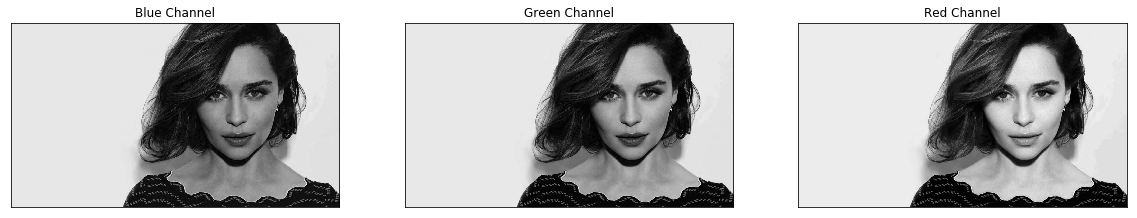

In [14]:
b,g,r = cv2.split(img)
img_plot_gray((20,10),[img_to_plot(b,"Blue Channel"),img_to_plot(g,"Green Channel"),img_to_plot(r,"Red Channel")])


Wall time: 6.51 ms
Wall time: 5.51 ms
Wall time: 6 ms


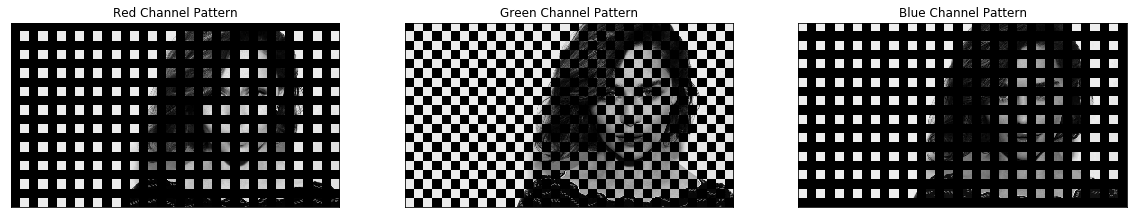

[[236.   0. 236.   0. 236.   0. 236.   0. 236.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [236.   0. 236.   0. 236.   0. 236.   0. 236.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [236.   0. 236.   0. 236.   0. 236.   0. 236.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [236.   0. 236.   0. 236.   0. 236.   0. 236.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [236.   0. 236.   0. 236.   0. 236.   0. 236.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]]
[[  0. 230.   0. 230.   0. 230.   0. 230.   0. 230.]
 [230.   0. 230.   0. 230.   0. 230.   0. 230.   0.]
 [  0. 230.   0. 230.   0. 230.   0. 230.   0. 230.]
 [230.   0. 230.   0. 230.   0. 230.   0. 230.   0.]
 [  0. 230.   0. 230.   0. 230.   0. 230.   0. 230.]
 [230.   0. 230.   0. 230.   0. 230.   0. 230.   0.]
 [  0. 230.   0. 230.   0. 230.   0. 230.   0. 230.]
 [230.   0. 230.   0. 230.   0. 230.   0. 230.   0.]
 [  0. 230.   0. 230.   0. 230.   0. 230.   0

In [15]:
%time bp_r = r_pattern*r
%time bp_g = g_pattern*g
%time bp_b = b_pattern*b

#print(bp_r)
#print(bp_b)
#print(bp_g)


plt.figure(figsize=(20,10))
plt.subplot(1,3,1)
plt.title("Red Channel Pattern")
plt.imshow(bp_r, cmap="gray")
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.subplot(1,3,2)
plt.title("Green Channel Pattern")
plt.imshow( bp_g, cmap="gray")
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.subplot(1,3,3)
plt.title("Blue Channel Pattern")
plt.imshow(bp_b, cmap="gray")
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()
print(bp_r[10:20,10:20]) 
print(bp_g[10:20,10:20]) 
print(bp_b[10:20,10:20]) 

In [16]:
def fill_cross(matrix,shift_r,shift_c):
    
    matrixb = np.copy(matrix)
    
    irange = range(shift_r,matrix.shape[0]-1,2)
    jrange = range(shift_c,matrix.shape[1]-1,2)
    
    for i in irange:
        for j in jrange:
            matrixb[i,j] = (matrix[i+1,j+1] + matrix[i+1,j-1] + matrix[i-1,j+1] + matrix[i-1,j-1])/4
    return matrixb

Wall time: 367 ms
Wall time: 362 ms
Wall time: 0 ns


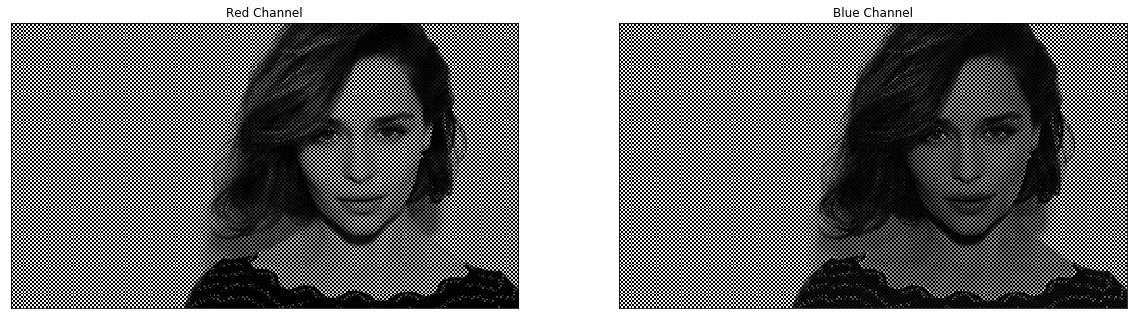

In [17]:
%time fc_bp_r = fill_cross(bp_r,1,1)
%time fc_bp_b = fill_cross(bp_b,2,2)
%time fc_bp_g = bp_g

plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.title("Red Channel")
plt.imshow(fc_bp_r, cmap="gray")
plt.xticks([]), plt.yticks([])
plt.subplot(1,2,2)
plt.title("Blue Channel")
plt.imshow(fc_bp_b, cmap="gray")
plt.xticks([]), plt.yticks([])
plt.show()


In [18]:
def fill_diag(matrix,shift_rp,shift_rd,shift_c_rp,shift_c_rd):
    
    matrixb = np.copy(matrix)
    
    irange = range(shift_rp,matrix.shape[0]-1,2)
    jrange = range(shift_c_rp,matrix.shape[1]-1,2)
    
    for i in irange:
        for j in jrange:
            matrixb[i][j] = (matrix[i+1][j]+ matrix[i-1][j]+ matrix[i][j+1]+ matrix[i][j-1])/4
            
    irange = range(shift_rd,matrix.shape[0]-1,2)
    jrange = range(shift_c_rd,matrix.shape[1]-1,2)
    
    for i in irange:
        for j in jrange:
            matrixb[i][j] = (matrix[i+1][j]+ matrix[i-1][j]+ matrix[i][j+1]+ matrix[i][j-1])/4
            
    return matrixb

Wall time: 955 ms
Wall time: 903 ms
Wall time: 870 ms


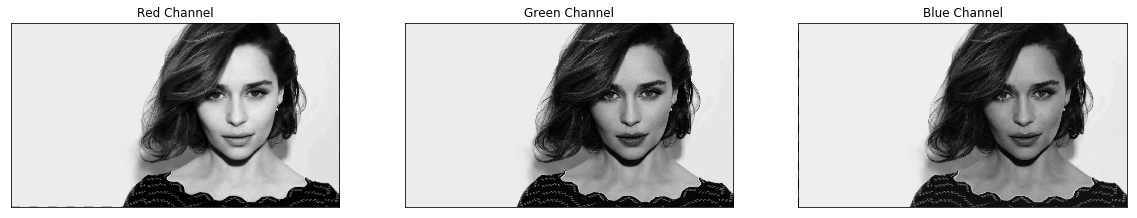

In [19]:
%time fd_bp_r = fill_diag(fc_bp_r,1,2,2,1)
%time fd_bp_b = fill_diag(fc_bp_b,2,3,3,2)
%time fd_bp_g = fill_diag(fc_bp_g,1,2,1,2)

plt.figure(figsize=(20,10))
plt.subplot(1,3,1)
plt.title("Red Channel")
#plt.imshow(r, cmap="Reds")
plt.imshow(fd_bp_r, cmap="gray")
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.subplot(1,3,2)
plt.title("Green Channel")
#plt.imshow(g, cmap="Greens")
plt.imshow(fd_bp_g, cmap="gray")
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.subplot(1,3,3)
plt.title("Blue Channel")
#plt.imshow(b, cmap="Blues")
plt.imshow(fd_bp_b, cmap="gray")
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

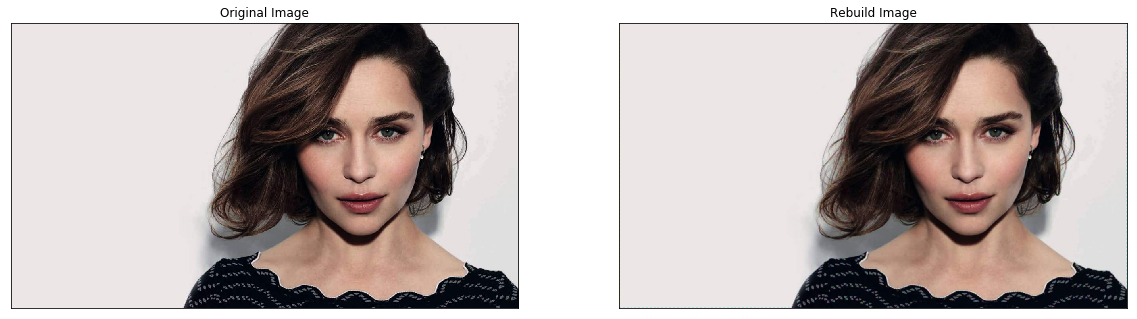

In [21]:
Ricostruzione = cv2.merge((fd_bp_b,fd_bp_g,fd_bp_r))
Ricostruzione = Ricostruzione.astype(np.uint8)



plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.title("Original Image")
plt.imshow(img_invert_color(img))
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.subplot(1,2,2)
plt.title("Rebuild Image")
plt.imshow(img_invert_color(Ricostruzione))
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

In [22]:
PSNRv(img,Ricostruzione,5)

Red Channel:  48.61368153134496 dB
Green Channel:  51.958836418587005 dB
Blue Channel:  48.62545572607865 dB
Image:  45.966180964150524 dB


-74.3125 316.75
316.75
-74.3125


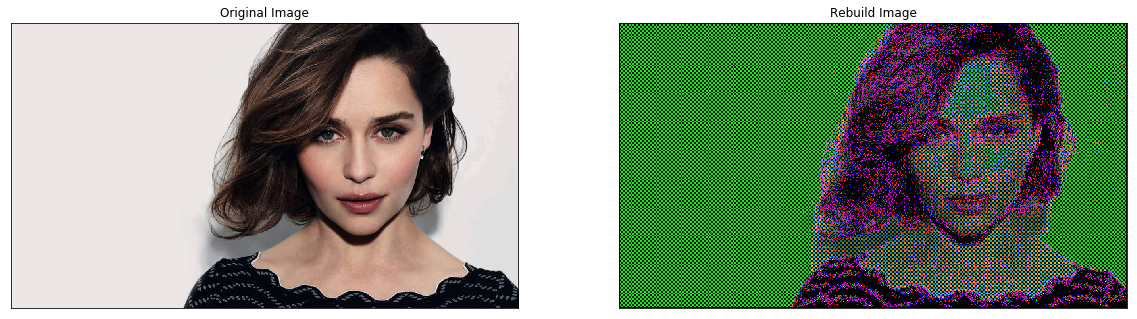

In [22]:
Seconda = np.zeros((img.shape[0],img.shape[1],img.shape[2]))

irange = range(img.shape[0]-2)[2:]
jrange = range(img.shape[1]-2)[2:]

for i in irange:
    for j in jrange:
        if (i+1)%2 is 0:
            if (j+1)%2 is 0:
                
                Seconda[i][j][0] = bp_b[i][j]
                
                Seconda[i][j][1] = (4.)*bp_b[i][j]
                Seconda[i][j][1] = Seconda[i][j][1] - (1.)*(bp_b[i+2][j]+bp_b[i-2][j]+bp_b[i][j+2]+bp_b[i][j-2])
                Seconda[i][j][1] = Seconda[i][j][1] + (2.)*(bp_g[i+1][j]+bp_g[i-1][j]+bp_g[i][j+1]+bp_g[i][j-1])
                
                Seconda[i][j][2] = (6.)*bp_b[i][j]
                Seconda[i][j][2] = Seconda[i][j][2] - (1.)*(bp_b[i+2][j]+bp_b[i-2][j]+bp_b[i][j+2]+bp_b[i][j-2])
                Seconda[i][j][2] = Seconda[i][j][2] + (2.)*(bp_r[i+1][j+1]+bp_r[i-1][j+1]+bp_r[i-1][j+1]+bp_r[i+1][j-1])
                
            if (j+1)%2 is 1: 
                Seconda[i][j][1] = bp_g[i][j]
                
                Seconda[i][j][0] = (5.)*bp_g[i][j]
                Seconda[i][j][0] = Seconda[i][j][0] + (1.0/2)*(bp_g[i+2][j]+bp_g[i-2][j])
                Seconda[i][j][0] = Seconda[i][j][0] - (1.0)*(bp_g[i][j+2]+bp_g[i][j-2])                     
                Seconda[i][j][0] = Seconda[i][j][0] - (1.0)*(bp_g[i+1][j+1]+bp_g[i-1][j-1]+bp_g[i+1][j-1]+bp_g[i-1][j+1])
                Seconda[i][j][0] = Seconda[i][j][0] + (4.0)*(bp_b[i][j+2]+bp_b[i][j-2])
                                                               
                Seconda[i][j][2] = (5.)*bp_g[i][j]
                Seconda[i][j][2] = Seconda[i][j][2] + (1.0/2)*(bp_g[i][j+2]+bp_g[i][j-2])
                Seconda[i][j][2] = Seconda[i][j][2] - (1.0)*(bp_g[i+2][j]+bp_g[i-2][j])                     
                Seconda[i][j][2] = Seconda[i][j][2] - (1.0)*(bp_g[i+1][j+1]+bp_g[i-1][j-1]+bp_g[i+1][j-1]+bp_g[i-1][j+1])
                Seconda[i][j][2] = Seconda[i][j][2] + (4.0)*(bp_r[i+2][j]+bp_r[i-2][j])
                
        if (i+1)%2 is 1:
            if (j+1)%2 is 0:

                Seconda[i][j][1] = bp_g[i][j]
                
                Seconda[i][j][2] = (5.)*bp_g[i][j]
                Seconda[i][j][2] = Seconda[i][j][2] + (1.0/2)*(bp_g[i+2][j]+bp_g[i-2][j])
                Seconda[i][j][2] = Seconda[i][j][2] - (1.0)*(bp_g[i][j+2]+bp_g[i][j-2])                     
                Seconda[i][j][2] = Seconda[i][j][2] - (1.0)*(bp_g[i+1][j+1]+bp_g[i-1][j-1]+bp_g[i+1][j-1]+bp_g[i-1][j+1])
                Seconda[i][j][2] = Seconda[i][j][2] + (4.0)*(bp_r[i][j+2]+bp_r[i][j-2])
                                                               
                Seconda[i][j][0] = (5.)*bp_g[i][j]
                Seconda[i][j][0] = Seconda[i][j][0] + (1.0/2)*(bp_g[i][j+2]+bp_g[i][j-2])
                Seconda[i][j][0] = Seconda[i][j][0] - (1.0)*(bp_g[i+2][j]+bp_g[i-2][j])                     
                Seconda[i][j][0] = Seconda[i][j][0] - (1.0)*(bp_g[i+1][j+1]+bp_g[i-1][j-1]+bp_g[i+1][j-1]+bp_g[i-1][j+1])
                Seconda[i][j][0] = Seconda[i][j][0] + (4.0)*(bp_b[i+2][j]+bp_b[i-2][j])

                
            if (j+1)%2 is 1:
                Seconda[i][j][2] = bp_r[i][j]
                
                Seconda[i][j][1] = (4.)*bp_r[i][j]
                Seconda[i][j][1] = Seconda[i][j][1] - (1.)*(bp_r[i+2][j]+bp_r[i-2][j]+bp_r[i][j+2]+bp_r[i][j-2])
                Seconda[i][j][1] = Seconda[i][j][1] + (2.)*(bp_g[i+1][j]+bp_g[i-1][j]+bp_g[i][j+1]+bp_g[i][j-1])
                
                Seconda[i][j][0] = (6.)*bp_r[i][j]
                Seconda[i][j][0] = Seconda[i][j][0] - (1.)*(bp_r[i+2][j]+bp_r[i-2][j]+bp_r[i][j+2]+bp_r[i][j-2])
                Seconda[i][j][0] = Seconda[i][j][0] + (2.)*(bp_b[i+1][j+1]+bp_b[i-1][j+1]+bp_b[i-1][j+1]+bp_b[i+1][j-1])
        Seconda[i][j][0] = Seconda[i][j][0]/8
        Seconda[i][j][1] = Seconda[i][j][1]/8
        Seconda[i][j][2] = Seconda[i][j][2]/8
                

_max = 0;
_min = 0;

for i in range(Seconda.shape[0]):
    for j in range(Seconda.shape[1]):
        for k in range(Seconda.shape[2]):
            _max = max(Seconda[i,j,k],_max)
            _min = min(Seconda[i,j,k],_min)
print(_min,_max)

#for i in range(Seconda.shape[0]):
    #for j in range(Seconda.shape[1]):
        #for k in range(Seconda.shape[2]):
            #Seconda[i,j,k] = ((Seconda[i,j,k]-_min)/_max)*255
            #if Seconda[i,j,k]>255: 
            #    Seconda[i,j,k] = ((Seconda[i,j,k])/_max)*255
            #if Seconda[i,j,k]<0: 
            #    Seconda[i,j,k] = ((Seconda[i,j,k])/_max)*255

print(_max) 
print(_min) 


Seconda = Seconda.astype(np.uint8)
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.title("Original Image")
plt.imshow(img_invert_color(img.astype(np.uint8)))
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.subplot(1,2,2)
plt.title("Rebuild Image")
plt.imshow(img_invert_color(Seconda))
plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

In [35]:
PSNRv(img,Seconda,5)

Red Channel:  26.429381752308394 dB
Green Channel:  29.007731978937823 dB
Blue Channel:  26.47222529497562 dB
Image:  24.180749555594453 dB
